In [7]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# The Basics of Linear Regression

Linear regression models the relationship between the dependent variable $Y$ and the independent variable $X$ as a straight line. This relationship is expressed as:

$ Y = \beta_0 + \beta_1X + \epsilon $

Where:

- $\beta_0$ is the intercept,
- $\beta_1$ is the slope of the line,
- $\epsilon$ is the error term.


In [8]:
# Function to create a dataset with a linear relationship
def create_linear_data(n, slope, intercept, noise_variance):
    """
    Generates a linear dataset with normally distributed noise.
    """
    x = np.linspace(5, 15, n)
    y = slope * x + intercept + np.random.normal(0, noise_variance, n)
    return x, y


# Visualizing Linear Data

To understand how well linear regression can model a dataset, it's helpful to visualize the data along with the regression line. When we have data that exhibits a linear relationship, a simple linear regression model can often fit this data very well. 

The process involves generating a set of data points that align closely to a line with a specific slope and intercept. By incorporating normally distributed random noise into this data, we can simulate real-world observations where measurements are not perfect due to various sources of random variation.

Once we have our simulated dataset, we use linear regression to find the best-fitting line. The `linregress` function from the `scipy.stats` module is perfect for this task as it calculates a linear least-squares regression for two sets of measurements.

Here's the step-by-step approach we'll take in our code:

1. **Data Generation**: We will define a function, `create_linear_data`, which takes the number of points, the slope and intercept of the true line, and the variance of the noise as inputs. It will output a set of `x` and `y` values that form our linear dataset with added noise.
2. **Linear Regression**: Using the `linregress` function, we will compute the best-fit line. This function returns the slope and intercept of the line that minimizes the sum of the squares of the residuals (the differences between the observed `y` and the predicted `y` from the regression line).
3. **Visualization**: With `matplotlib.pyplot`, we will create a scatter plot of the data points and overlay the regression line. This will allow us to visually assess the fit of our model.

By observing how closely the regression line matches our data points, we can gauge the effectiveness of linear regression on this linear data.


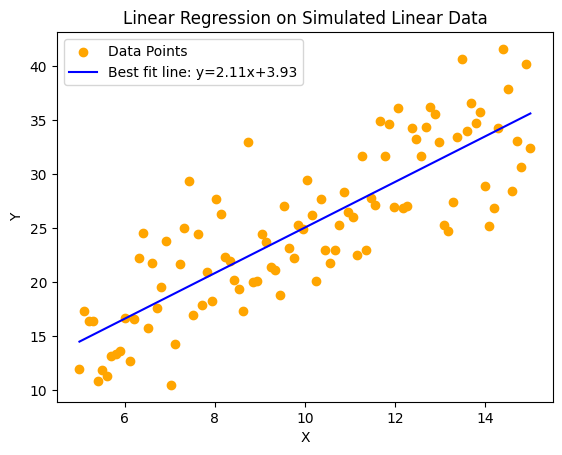

In [9]:
# Define parameters for our linear data
num_points = 100
true_slope = 2
true_intercept = 5
noise_variance = 4

# Generate the linear data using the parameters
x, y = create_linear_data(num_points, true_slope, true_intercept, noise_variance)

# Step 2: Linear Regression
# Apply linear regression to our data to find the best fit line
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Step 3: Visualization
# Create a scatter plot of the generated linear data
plt.scatter(x, y, color='orange', label='Data Points')

# Plot the best fit line
plt.plot(x, intercept + slope*x, 'blue', label=f'Best fit line: y={slope:.2f}x+{intercept:.2f}')

# Add labels and legend to the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression on Simulated Linear Data')
plt.legend()

# Show the plot
plt.show()

# Understanding and Visualizing Residuals

Residuals are the differences between the observed values and the values predicted by the regression model. They are crucial in diagnosing the fit of a regression model. By plotting the residuals, we can check for patterns that indicate non-linearity, heteroscedasticity (non-constant variance of residuals), or outliers that could affect our regression model.

A residual plot is a scatter plot of the predicted values against the residuals. Ideally, we want to see the residuals randomly scattered around zero, indicating that the model's predictions are accurate on average.

> **Note**: It is important to run the notebook cells in order. Running cells out of order can lead to inconsistencies/errors in the model parameters and plots.

Here's how we calculate and visualize residuals in our code:

1. **Calculate Residuals**: Subtract the predicted values from the observed values to get the residuals.
2. **Plot Residuals**: Create a scatter plot with the predicted values on the x-axis and the residuals on the y-axis.
3. **Analyze the Residual Plot**: Look for patterns in the residual plot. Randomly scattered residuals around zero suggest a good fit for a linear model. Systematic patterns suggest a poor fit and that a non-linear model may be more appropriate.


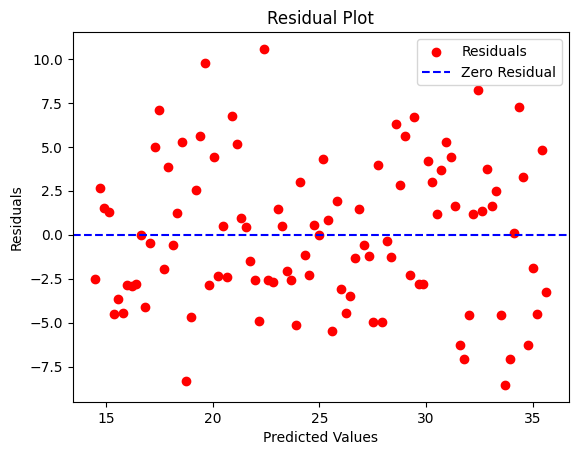

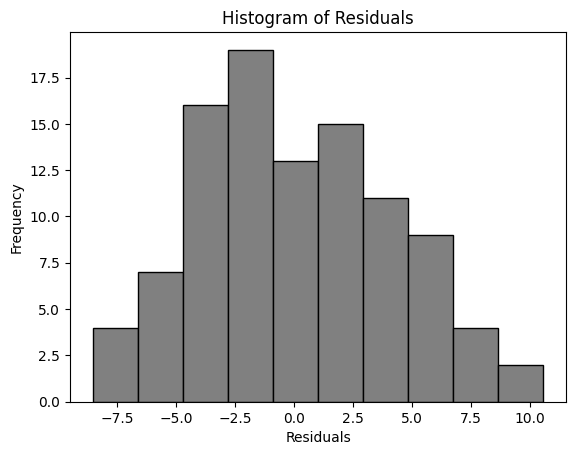

In [10]:
# Calculate the predicted values
predicted_values = intercept + slope * x

# Calculate residuals
residuals = y - predicted_values

# Create a scatter plot of predicted values against residuals
plt.scatter(predicted_values, residuals, color='red', label='Residuals')

# Plot a horizontal line at zero to help visualize the residuals
plt.axhline(y=0, color='blue', linestyle='--', label='Zero Residual')

# Add labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()

# Show the plot
plt.show()

# Plotting histogram of residuals to analyze the distribution
plt.hist(residuals, bins=10, color='grey', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


# Linear Regression on Quadratic Data

When applying linear regression to data, it's important to consider the underlying relationship between the variables. If the relationship is not linear, then a simple linear regression may not provide a good fit. To demonstrate this, we will generate a dataset based on a quadratic equation, which inherently has a non-linear relationship between the independent and dependent variables.

We will then apply linear regression to this quadratic dataset and visualize the result. The expectation is that the linear regression model will not be able to capture the curvature inherent in the quadratic relationship, thus illustrating the limitations of linear regression for non-linear data.

The quadratic data is generated using the function `create_quadratic_data` which simply creates a set of points that follow the equation $\ y = 2x^2 $. This creates a perfect parabola without any noise, emphasizing the non-linear pattern.

After generating the data, we perform linear regression using the `linregress` function from `scipy.stats` to compute the best-fit line. This line is then plotted against the quadratic data to visually assess the fit.



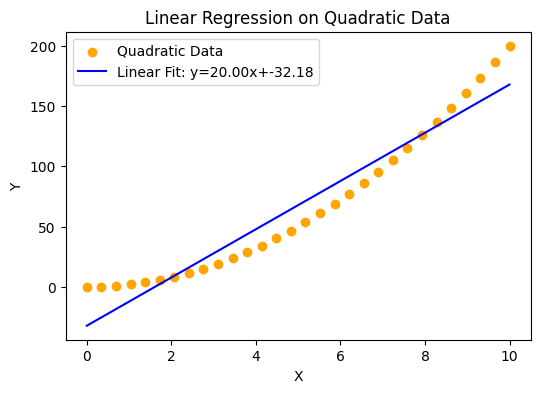

In [11]:

# Function to create a quadratic dataset without noise
def create_quadratic_data(n):
    """
    Generates a quadratic dataset without noise.

    Parameters:
    - n (int): The number of data points.

    Returns:
    - x (ndarray): Independent variable data.
    - y (ndarray): Dependent variable data.
    """
    x = np.linspace(0, 10, n)
    y = 2 * x**2  # Quadratic equation: y = 2x^2
    return x, y

# Generate quadratic data
x, y = create_quadratic_data(30)

# Perform linear regression
res = linregress(x, y)

# Plot data and linear fit
plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='orange', label='Quadratic Data')
plt.plot(x, res.intercept + res.slope*x, 'b', label=f'Linear Fit: y={res.slope:.2f}x+{res.intercept:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression on Quadratic Data')
plt.legend()
plt.show()



The code block and the corresponding plot demonstrate that while the linear regression line does follow the general increasing trend of the data, it fails to model the curvature, thus resulting in a poor fit. This example highlights why more complex models, such as polynomial regression, are necessary for capturing non-linear relationships in data.

# Linear Regression with an Outlier

The presence of outliers in a dataset can significantly impact the results of a linear regression analysis. An outlier is a data point that is significantly different from other observations. It can arise due to variability in measurement or it may indicate experimental error. The effects of outliers can be misleading as they can affect the slope and intercept of the regression line, leading to a poor fit for the rest of the data.

In this section, we will:
1. Generate a linear dataset using a predefined slope and intercept.
2. Introduce an outlier into the dataset.
3. Perform linear regression on the dataset that includes the outlier.
4. Visualize the results to observe the effect of the outlier on the regression line.

We will use the function `create_linear_data_with_outlier` which creates a linear set of data points based on a given slope and intercept. We then manually set one of the data points to be an outlier with a significantly different value.

After generating this data, we perform linear regression and plot the results. The plot will help us visualize how the outlier affects the regression line. Typically, we would expect the regression line to be skewed towards the outlier, which may misrepresent the true relationship between the variables for the rest of the data.


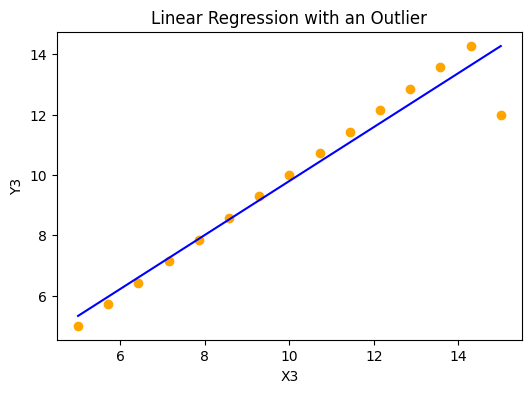

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Function to create a linear dataset with an outlier
def create_linear_data_with_outlier(n, slope, intercept, outlier_position, outlier_value):
    """
    Generates a linear dataset with one outlier.

    Parameters:
    - n (int): The number of data points.
    - slope (float): The slope of the line.
    - intercept (float): The y-intercept of the line.
    - outlier_position (int): The index of the outlier in the dataset.
    - outlier_value (float): The value of the outlier.

    Returns:
    - x (ndarray): Independent variable data.
    - y (ndarray): Dependent variable data with one outlier.
    """
    x = np.linspace(5, 15, n)
    y = slope * x + intercept
    y[outlier_position] = outlier_value  # Introduce an outlier
    return x, y

# Generate linear data with an outlier
n = 15
x, y = create_linear_data_with_outlier(n, slope=1, intercept=0, outlier_position=n-1, outlier_value=12)

# Perform linear regression
res = linregress(x, y)

# Plot data and linear fit
plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='orange')
plt.plot(x, res.intercept + res.slope*x, 'b')
plt.xlabel('X3')
plt.ylabel('Y3')
plt.title('Linear Regression with an Outlier')
plt.show()
